In [131]:
import glob
import os
import re
import pickle
from io import StringIO
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import torch
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


%matplotlib inline

In [114]:
input_lines = []
with open('model_data/data/all_data.csv') as f:
    for line in f:
        input_lines.append(line)
del input_lines[404]                
len(input_lines)

473

In [75]:
os.listdir("model_data/data")

['all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.95_loss.0.755801.csv',
 'caret.csv',
 'numpy.csv',
 'sklearn.csv',
 'all_data.csv',
 'scipy.csv',
 'all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.99_loss.0.6853602.csv',
 'all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.97_loss.0.750086.csv']

In [117]:
output_lines = []
with open('model_data/data/all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.99_loss.0.6853602.csv') as f:
    for line in f:
        output_lines.append(line)
del output_lines[404]        
len(output_lines)

473

In [120]:
matched = []
for line_idx in range(len(output_lines)):
    matched.append((input_lines[line_idx], output_lines[line_idx]))

matched_clean_idxs = [re.match(".*[A-Z].*", x[1]) is None for x in matched]
matched_clean = [x for x in matched if not re.match(".*[A-Z].*", x[1])]
matched_clean_vectors = [x[1].split(",") for x in matched_clean[1:]]

vec_matrix = np.array(matched_clean_vectors)
vec_matrix.shape

(458, 100)

In [121]:
matched_clean_idxs

[True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [78]:


distances = distance.cdist([vec_matrix[5]], vec_matrix, "cosine")[0]
# min_index = np.argmin(distances)
ind = np.argpartition(distances, 6)[:6]
sorted_ind = ind[np.argsort(distances[ind])]
min_distances = distances[sorted_ind]
max_similarity = [1 - x for x in min_distances]

In [79]:
max_similarity

[1.0,
 0.651529930521255,
 0.6213898333778319,
 0.619677542475636,
 0.617218577679545,
 0.6120399246897927]

In [80]:
def topNMatches(idx, matrix, n=5):
    
    distances = distance.cdist([matrix[idx]], matrix, "cosine")[0]

    ind = np.argpartition(distances, n+1)[:(n+1)]
    sorted_ind = ind[np.argsort(distances[ind])][1:]
    min_distances = distances[sorted_ind]
    max_similarity = [1 - x for x in min_distances]
    
    return (max_similarity, sorted_ind)

In [81]:
similarity, idxs = topNMatches(5, vec_matrix)

In [82]:
idxs

array([179,  93, 124, 323, 302])

In [83]:
target = matched[5]
matches = [matched[i] for i in idxs]

100

In [129]:
rankings = defaultdict(list)
for idx in range(vec_matrix.shape[0]):
    rankings[idx] = list(topNMatches(idx, vec_matrix, n=5))

In [132]:
with open('vector_recommendations.pkl', 'wb') as f:
    pickle.dump(rankings, f)

In [128]:
for x in zip([1,2,3],[4,5,6]):
    print(x)

(1, 4)
(2, 5)
(3, 6)


## tsne

<ipython-input-85-ad41dcf565ed>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



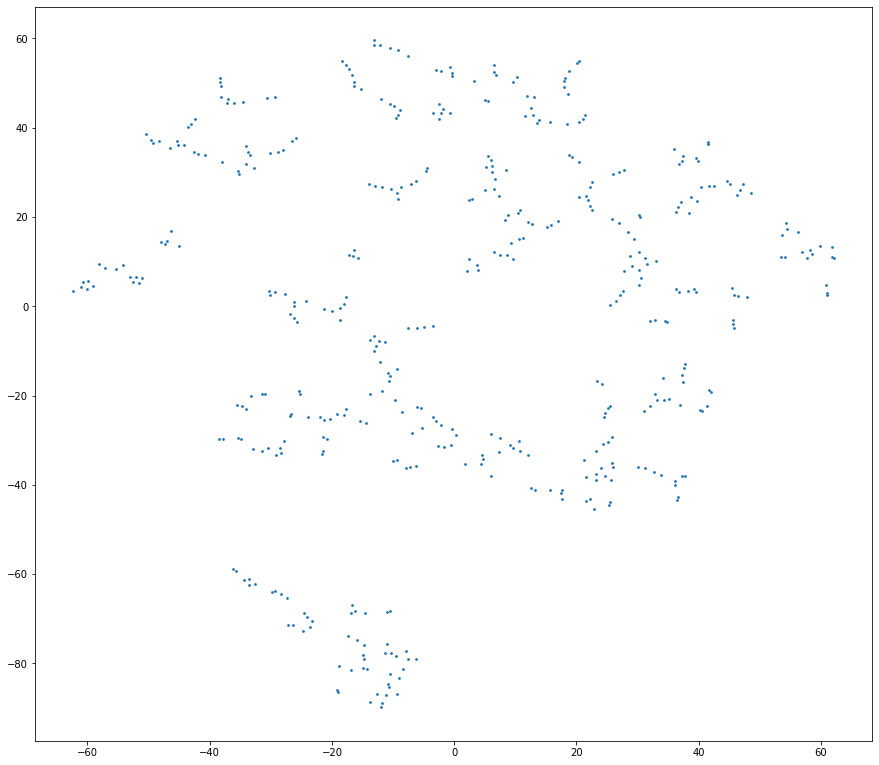

In [85]:
doc_pca = PCA(n_components=5).fit_transform(vec_matrix)
tsne = TSNE(n_components=2, perplexity=5).fit_transform(doc_pca)


fig, ax = plt.subplots()
ax.scatter(tsne[:,0], tsne[:,1],s=3)
# for x, y, token in zip(tsne[:,0],tsne[:,1],mft):
#     ax.annotate(token, xy=(x,y), size=10)

fig.set_size_inches(15,13.5)
fig.show()



In [86]:
import plotly.express as px

In [87]:
tsne_df = pd.DataFrame(tsne, columns=['x', 'y'])

In [88]:


fig2 = px.scatter(tsne_df, x="x", y="y",
#                  size="population", color="continent", hover_name="country",
                  size_max=60)

In [89]:
fig2

In [96]:
languages = {'caret': 'R', 'numpy': 'Python', 'scipy': 'Python', 'sklearn': 'Python'}

In [99]:
name_lookup = [(x[0].strip('"').split("_")[0], languages.get(x[0].strip('"').split("_")[0])) for x in matched_clean[1:]]

In [100]:
[x[0] for x in matched_clean[1:]]

['"caret_11_subsampling_for_class_imbalances 11 Subsampling For Class Imbalances subsampling-for-class-imbalances.html  11.1 Subsampling Techniques To illustrate these methods, let’s simulate some data with a class imbalance using this method. We will simulate a training and test set where each contains 10000 samples and a minority class rate of about 5.9%: Let’s create different versions of the training set prior to model tuning: For these data, we’ll use a bagged classification and estimate the area under the ROC curve using five repeats of 10-fold CV. We will collate the resampling results and create a wrapper to estimate the test set performance: The training and test set estimates for the area under the ROC curve do not appear to correlate. Based on the resampling results, one would infer that up-sampling is nearly perfect and that ROSE does relatively poorly. The reason that up-sampling appears to perform so well is that the samples in the majority class are replicated and have a

In [103]:
lineList = []
with open('model_data/data/all_labels.csv') as f:
    for line in f:
        lineList.append(line.strip().split("|"))

In [122]:
pd.DataFrame(lineList[1:])

,0,1,2,3,4,5
0,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.1 Subsampling Techniques To
1,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.2 Subsampling During Resampling
2,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.3 Complications The
3,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.4 Using Custom Subsampling
4,caret,R,caret_12_using_recipes_with_train,12 Using Recipes with train,using-recipes-with-train.html,12.1 Why Should
...,...,...,...,...,...,...
470,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Building specific distributions
471,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Comparing two samples
472,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Introduction In this
473,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Kernel density estimation
